In [3]:
data = pd.read_csv(r"A:\creditcardModified.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


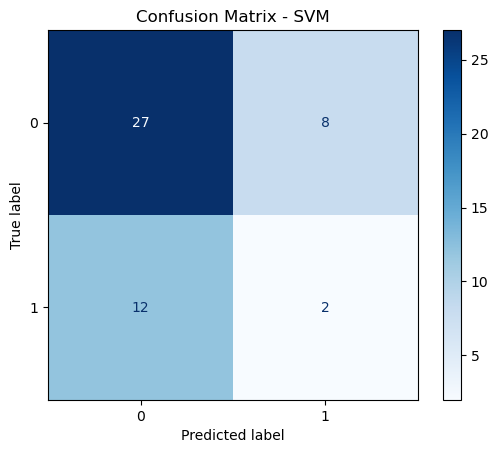

Hyperplane plot only available for 2D data.


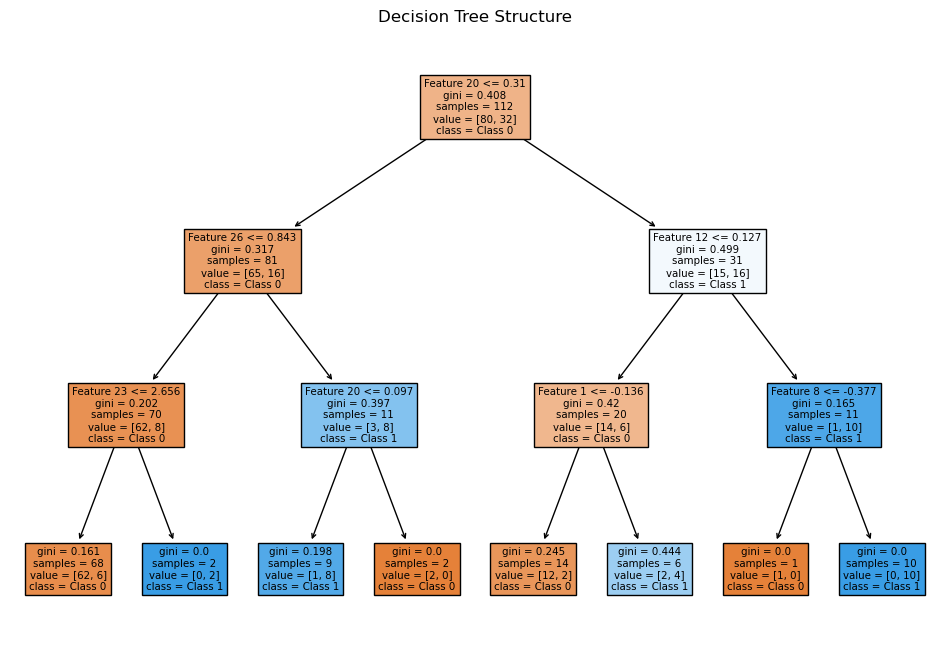

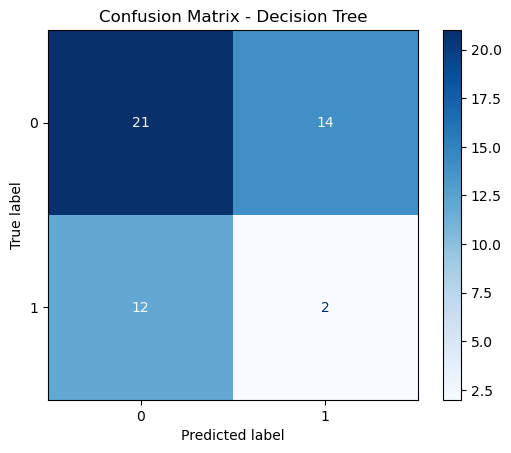

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Load the dataset
df = pd.read_csv(r"A:\creditcardModified.csv")

# Step 2: Drop rows with missing values
df_cleaned = df.dropna()

# Step 3: Select features and target
X = df_cleaned.drop(['Time', 'Class'], axis=1).values
y = df_cleaned['Class'].values

# Step 4: Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 5: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Define the SVM Classifier using OOP
class SVMClassifier:
    def __init__(self, kernel='linear', C=1.0):
        self.kernel = kernel
        self.C = C
        self.model = SVC(kernel=self.kernel, C=self.C)

    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        return self.model.predict(X_test)


    def plot_confusion_matrix(self, y_test, y_pred):
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues')
        plt.title("Confusion Matrix - SVM")
        plt.show()

# Step 7: Train and evaluate the SVM model
svm_classifier = SVMClassifier(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

svm_classifier.plot_confusion_matrix(y_test, y_pred_svm)

# Step 8: Implement and train the Decision Tree model using OOP
class DecisionTreeModel:
    def __init__(self, criterion='gini', max_depth=None):
        self.criterion = criterion
        self.max_depth = max_depth
        self.model = DecisionTreeClassifier(criterion=self.criterion, max_depth=self.max_depth)

    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        return self.model.predict(X_test)

    def plot_decision_tree(self):
        plt.figure(figsize=(12, 8))
        plot_tree(self.model, filled=True, feature_names=[f'Feature {i+1}' for i in range(X_train.shape[1])], class_names=['Class 0', 'Class 1'])
        plt.title("Decision Tree Structure")
        plt.show()

    def plot_confusion_matrix(self, y_test, y_pred):
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues')
        plt.title("Confusion Matrix - Decision Tree")
        plt.show()

# Step 9: Train and evaluate the Decision Tree model
decision_tree = DecisionTreeModel(criterion='gini', max_depth=3)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)
decision_tree.plot_decision_tree()
decision_tree.plot_confusion_matrix(y_test, y_pred_tree)
